In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.offsetbox import AnchoredText

In [23]:
K_data = pd.read_csv("K_sensitivity.csv", header = 0, decimal = ",")
L_data = pd.read_csv("L_sensitivity.csv", header = 0, decimal = ",")

In [24]:
def func(x, a, b, c, d, e, f):
    return a*x**5 + b*x**4 + c*x**3 + d*x**2 + e*x + f

## K Sensitivity 

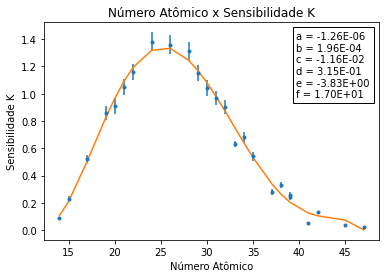

In [56]:
K_popt, K_pcov = curve_fit(func, K_data.X, K_data.Y, p0 = [1, 1, 1, 1, 1, 1])

K_y_fit = func(K_data.X, *K_popt)

#pretty formatting for printing

parameters_text = AnchoredText('a = {:.2E} \nb = {:.2E} \nc = {:.2E} \nd = {:.2E} \ne = {:.2E}\nf = {:.2E}'.format(*K_popt), loc = 'upper right')

fig, ax = plt.subplots()

ax.errorbar(K_data.X, K_data.Y, yerr = K_data.sY, fmt = '.')
ax.plot(K_data.X, K_y_fit, label = "polynomial fit")
ax.add_artist(parameters_text)

plt.title("Número Atômico x Sensibilidade K")
plt.ylabel("Sensibilidade K")
plt.xlabel("Número Atômico")

plt.savefig("K_sensitivity.png", dpi = 300)

testando ao redor do 41

In [62]:
z_test = np.arange(40, 46, 1)

for elem in func(z_test, *K_popt):
    print("{:.4f}".format(elem))

0.1576
0.1254
0.1052
0.0936
0.0853
0.0735


## L Sensitivity

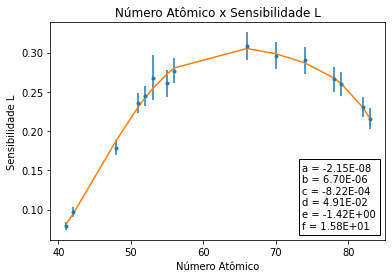

In [55]:
L_popt, L_pcov = curve_fit(func, L_data.x, L_data.y, p0 = [1, 1, 1, 1, 1, 1])

L_y_fit = func(L_data.x, *L_popt)

#pretty formatting for printing

parameters_text = AnchoredText('a = {:.2E} \nb = {:.2E} \nc = {:.2E} \nd = {:.2E} \ne = {:.2E}\nf = {:.2E}'.format(*L_popt), loc = 'lower right')

fig, ax = plt.subplots()

ax.errorbar(L_data.x, L_data.y, yerr = L_data.sy, fmt = '.')
ax.plot(L_data.x, L_y_fit)
ax.add_artist(parameters_text)

plt.title("Número Atômico x Sensibilidade L")
plt.ylabel("Sensibilidade L")
plt.xlabel("Número Atômico")

plt.savefig("L_sensitivity.png", dpi = 300)